In [1]:
# BIO-SELECT - Marigliano

In [2]:
from sklearn import neighbors, datasets
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline

# set float precision at 2 digits
np.set_printoptions(precision=2)

## Load datasamples from MILE

In [3]:
from sklearn.cross_validation import train_test_split

from datasets.EGEOD22619Dataset import EGEOD22619Dataset
from datasets.MileDataset import MileDataset

#ds = MileDataset(full_dataset=True)
ds = EGEOD22619Dataset()

X = ds.get_X()
y = ds.get_y()
#print(X)
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train[0]))

16
54675


## Classification using dumb KNN (all features)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4, algorithm="auto")
classifier = classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print("score :", score)

('score :', 1.0)


## Classification using ExtraTree

54675
300


(array([ 7854.,  8978.,  6888.,  5857.,  4897.,  4533.,  4046.,  3936.,
         3820.,  3866.]),
 array([  4.44e-05,   1.00e-01,   2.00e-01,   3.00e-01,   4.00e-01,
          5.00e-01,   6.00e-01,   7.00e-01,   8.00e-01,   9.00e-01,
          1.00e+00]),
 <a list of 10 Patch objects>)

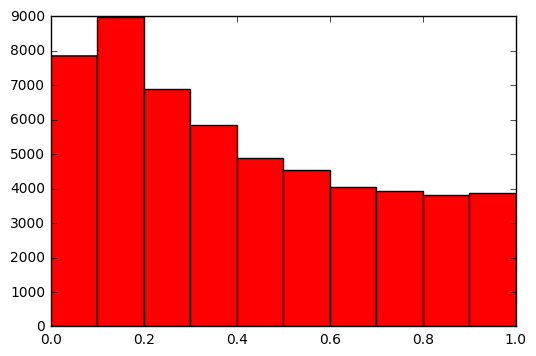

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_jobs=-1, n_estimators=25)
classifier = classifier.fit(X_train, y_train)

import sklearn.feature_selection as fs

classifier = fs.SelectKBest(fs.f_regression, k=300) #k is number of features.
print(len(X_train[1]))
X_train_selected = classifier.fit_transform(X_train, y_train)
print(len(X_train_selected[1]))

#score = classifier.score(X_test, y_test)
#print("score :", score)

#plt.plot(classifier.scores_)
plt.hist(classifier.pvalues_, color="red")

#plt.plot(classifier.feature_importances_)

## Feature selection

In [6]:
from skfeature.function.similarity_based import reliefF

print(X_train)
print(y_train)
score = reliefF.reliefF(X_train, np.array(y_train))

# print the best 5 features with their score
n_best_features = sorted(enumerate(score), key=lambda p:p[1], reverse=True)
print(n_best_features[:5])

# get best features indice
idx = reliefF.feature_ranking(score)
print(idx)

[[ 7.37  5.75  3.02 ...,  2.89  2.63  2.85]
 [ 7.72  5.36  2.91 ...,  2.82  2.58  2.79]
 [ 7.77  5.61  2.88 ...,  2.79  2.56  2.72]
 ..., 
 [ 7.09  5.33  3.1  ...,  2.87  2.64  2.82]
 [ 7.81  5.54  2.82 ...,  2.79  2.59  2.82]
 [ 7.41  5.62  3.01 ...,  2.92  2.66  2.86]]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
[(39614, 13.705999999999996), (22073, 13.273999999999999), (23896, 10.811999999999998), (24856, 10.725999999999999), (19537, 10.174000000000001)]
[39614 22073 23896 ..., 15267 17253 19843]


In [7]:
from skfeature.function.similarity_based import fisher_score

score = fisher_score.fisher_score(X_train, y_train)

# print the best 5 features with their score
n_best_features = sorted(enumerate(score), key=lambda p:p[1], reverse=True)
print(n_best_features[:5])

# get best features indice
idx = fisher_score.feature_ranking(score)
print(idx)

[(2658, 5.9638608305259639), (42471, 5.1723028126555119), (1642, 4.8078138829238704), (39780, 4.5549775240270849), (36737, 3.7796442687748462)]
[ 2658 42471  1642 ..., 47712  4085 47097]


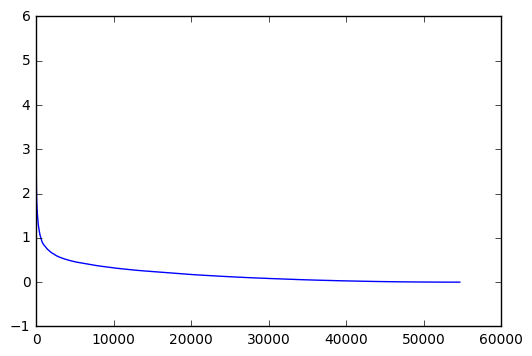

In [8]:
f = [f[0] for f in n_best_features]
s = [f[1] for f in n_best_features]
plt.plot(s)

### Test with http://featureselection.asu.edu/tutorial.php

max score 0.8 with 231 features
Best features are [ 2658 42471  1642 39780 36737 38643 43643 46858 16956 51631 48170 39497
   149 49859 46933 40553 10378  6738  6390 46781 38839 51975  9888  7071
 14350 29924 24550 46652 27857 31600 32625 15480 47919 27905 47987 31100
 17785 30974 35438  7576 30991  1393 41191 51404  7731 45293 25875 49985
 43630 26321 53625 41593 33976 28994 41773 47326  9660 25744  3609 53868
 47924 40865 43264 11736 24856 24052 26530 15471  8199 10445 45429  6333
 12773 16989 49207 31646 49191 53102 25941  8782 46331 42260 29448 40465
 42804 31644 15755  2893 42607 15308 22726 36945  8533  6528 29682 46676
 44685 32390 15598 22077 47177 24443 16924 11868 49762 43942  6231 40107
 26117  8115 45235 51789 32851 35742 49583 12155 44089 39016 36158  8071
 36645 52640 24930 46190 23819  5337  6195 13829  4659   592 28871 53242
 22078  5377   204 50046 40948  1683 52464  1359 48202 40567 22321 51022
 20011 10846 24191 51792 52734 47011 36292 37978 46320 53507  1079 37417
 

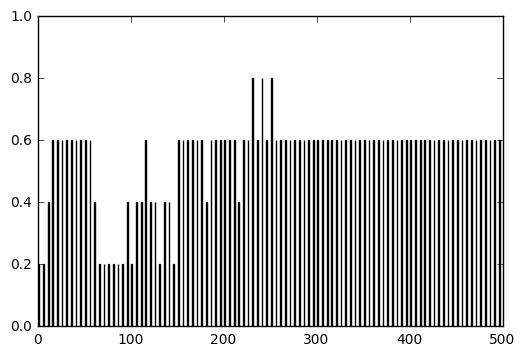

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score

acc = []

step = 5
max_features = 500
max_acc = -1.0
n_features = range(1, max_features, step)


for N in n_features:
    num_fea = N
    features_subset = idx[0:num_fea]
    
    selected_features_train = X_train[:, features_subset]
    selected_features_test = X_test[:, features_subset]

    clf = svm.LinearSVC()

    clf.fit(selected_features_train, y_train)
    y_predict = clf.predict(selected_features_test)

    last_acc = accuracy_score(y_test, y_predict)
    acc.append(last_acc)
    

    if last_acc > max_acc:
        max_acc = last_acc
        best_features = features_subset

ymin = 0
ymax = 1.0
plt.bar(n_features, acc)
plt.ylim([ymin,ymax])

print("max score %s with %s features" % (max_acc, len(best_features)))
print("Best features are %s" % best_features)
#TODO : get features name from dataset

In [10]:
# from skfeature.function.similarity_based import reliefF
# 
# print(X_train)
# print(y_train)
# score = reliefF.reliefF(X_train, y_train)
# 
# # print the best 5 features with their score
# n_best_features = sorted(enumerate(score), key=lambda p:p[1], reverse=True)
# print(n_best_features[:5])
# 
# # get best features indice
# idx = reliefF.feature_ranking(score)
# print(idx)

In [11]:
from skfeature.function.statistical_based import f_score

print(X_train)
print(y_train)
score = f_score.f_score(X_train, y_train)

# print the best 5 features with their score
n_best_features = sorted(enumerate(score), key=lambda p:p[1], reverse=True)
print(n_best_features[:3])

# get best features indice
idx = f_score.feature_ranking(score)
print(idx)

[[ 7.37  5.75  3.02 ...,  2.89  2.63  2.85]
 [ 7.72  5.36  2.91 ...,  2.82  2.58  2.79]
 [ 7.77  5.61  2.88 ...,  2.79  2.56  2.72]
 ..., 
 [ 7.09  5.33  3.1  ...,  2.87  2.64  2.82]
 [ 7.81  5.54  2.82 ...,  2.79  2.59  2.82]
 [ 7.41  5.62  3.01 ...,  2.92  2.66  2.86]]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
[(2658, 53.674747474754781), (42471, 46.550725313596118), (1642, 43.270324946321082)]
[ 2658 42471  1642 ..., 46896  4085 47097]


In [13]:
#from skfeature.function.wrapper import svm_backward
#
#print(X_train)
#print(y_train)
#score = svm_backward.svm_backward(X_train, np.array(y_train), n_selected_features=3)
#
## print the best 3 features with their score
#n_best_features = sorted(enumerate(score), key=lambda p:p[1], reverse=True)
#print(n_best_features[:3])
#
## get best features indice
#idx = svm_backward.feature_ranking(score)
#print(idx)